In [7]:
"""Compare the latency fit to all pulses (not just first) in connection_strength.ic_fit_xoffset, 
to that obtained by fitting the average first pulse.
This requires data saved into .csv files created from 
analyze_first_pulse_average.ipynb.  
"""
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook  
matplotlib.rcParams['figure.figsize'] = [8, 8]
import mpld3
mpld3.enable_notebook()

In [2]:
forced_df=pd.read_csv('average_fit_force_latency_2018_10_25.csv')  #data loaded from query above
default_df=pd.read_csv('average_fit_default_2018_10_25.csv')

In [3]:
#Merge the any sign versus forced sign data frames
merged_df = pd.merge(forced_df, default_df, on=['uid', 'pre_cell_id', 'post_cell_id', 
                                            'boolean_connection', 'distance', 
                                            'syn_excitation','measured_amp',
                                           'measured_baseline', 'n_sweeps'], how='inner', suffixes={'_f', '_a'})
merged_df['uid']=merged_df['uid'].astype(str)

# note that the length of the merged data frame equaling the len of the smallest 
# individual dataframe shows that the values being merged on are the same in the
# two databases.
print(len(forced_df))
print(len(default_df))
print(len(merged_df))
connected_df=merged_df[merged_df['boolean_connection']==True]

11387
11670
11387


951


<IPython.core.display.Javascript object>


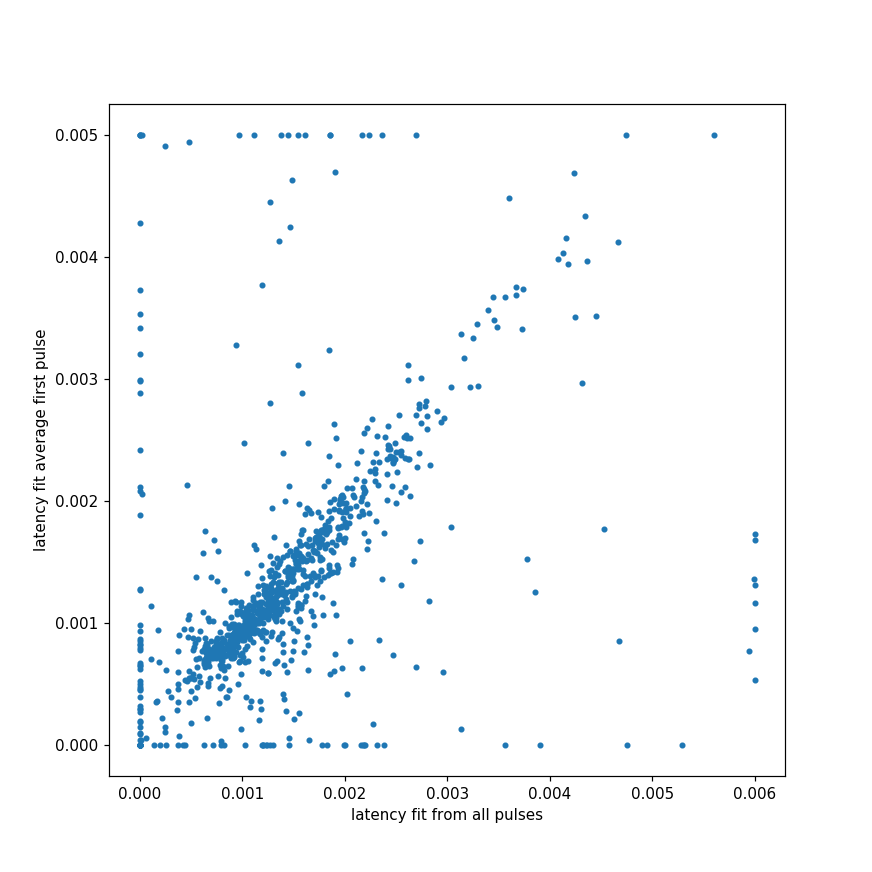

Text(0,0.5,'latency fit average first pulse')

In [10]:
print(len(connected_df))
plt.plot(connected_df["latency_f"], connected_df["latency_a"],  '.')
plt.xlabel('latency fit from all pulses')
plt.ylabel('latency fit average first pulse')

In [24]:
def select_data(df, f_limits, a_limits):
    '''Select rows of a dataframe based on limits'''
    selected_df=df[(df["latency_f"]>f_limits[0]) & (df["latency_f"]<f_limits[1]) &
                   (df["latency_a"]>a_limits[0]) & (df["latency_a"]<a_limits[1])]
    return selected_df

s_df=select_data(connected_df, [0, .001], [.004, .005])
print(s_df[["uid", "pre_cell_id", "post_cell_id", "latency_f", "latency_a", "n_sweeps"]])


                      uid  pre_cell_id  post_cell_id     latency_f  latency_a  \
821        1533760229.351            2             7  2.678413e-15   0.005000   
1740       1529352389.154            8             3  9.028391e-09   0.005000   
5532       1511994734.926            4             3  4.768298e-04   0.004941   
5737       1510784600.164            5             6  3.063517e-11   0.005000   
8843       1494452978.664            4             2  1.513484e-07   0.004279   
8917        1494361299.85            8             1  2.504150e-04   0.004909   
10024  1487794887.8179998            5             1  9.673259e-04   0.005000   
11131  1539896725.2020001            3             4  1.731271e-05   0.005000   

       n_sweeps  
821           2  
1740          1  
5532          6  
5737          1  
8843         42  
8917         39  
10024        35  
11131         5  


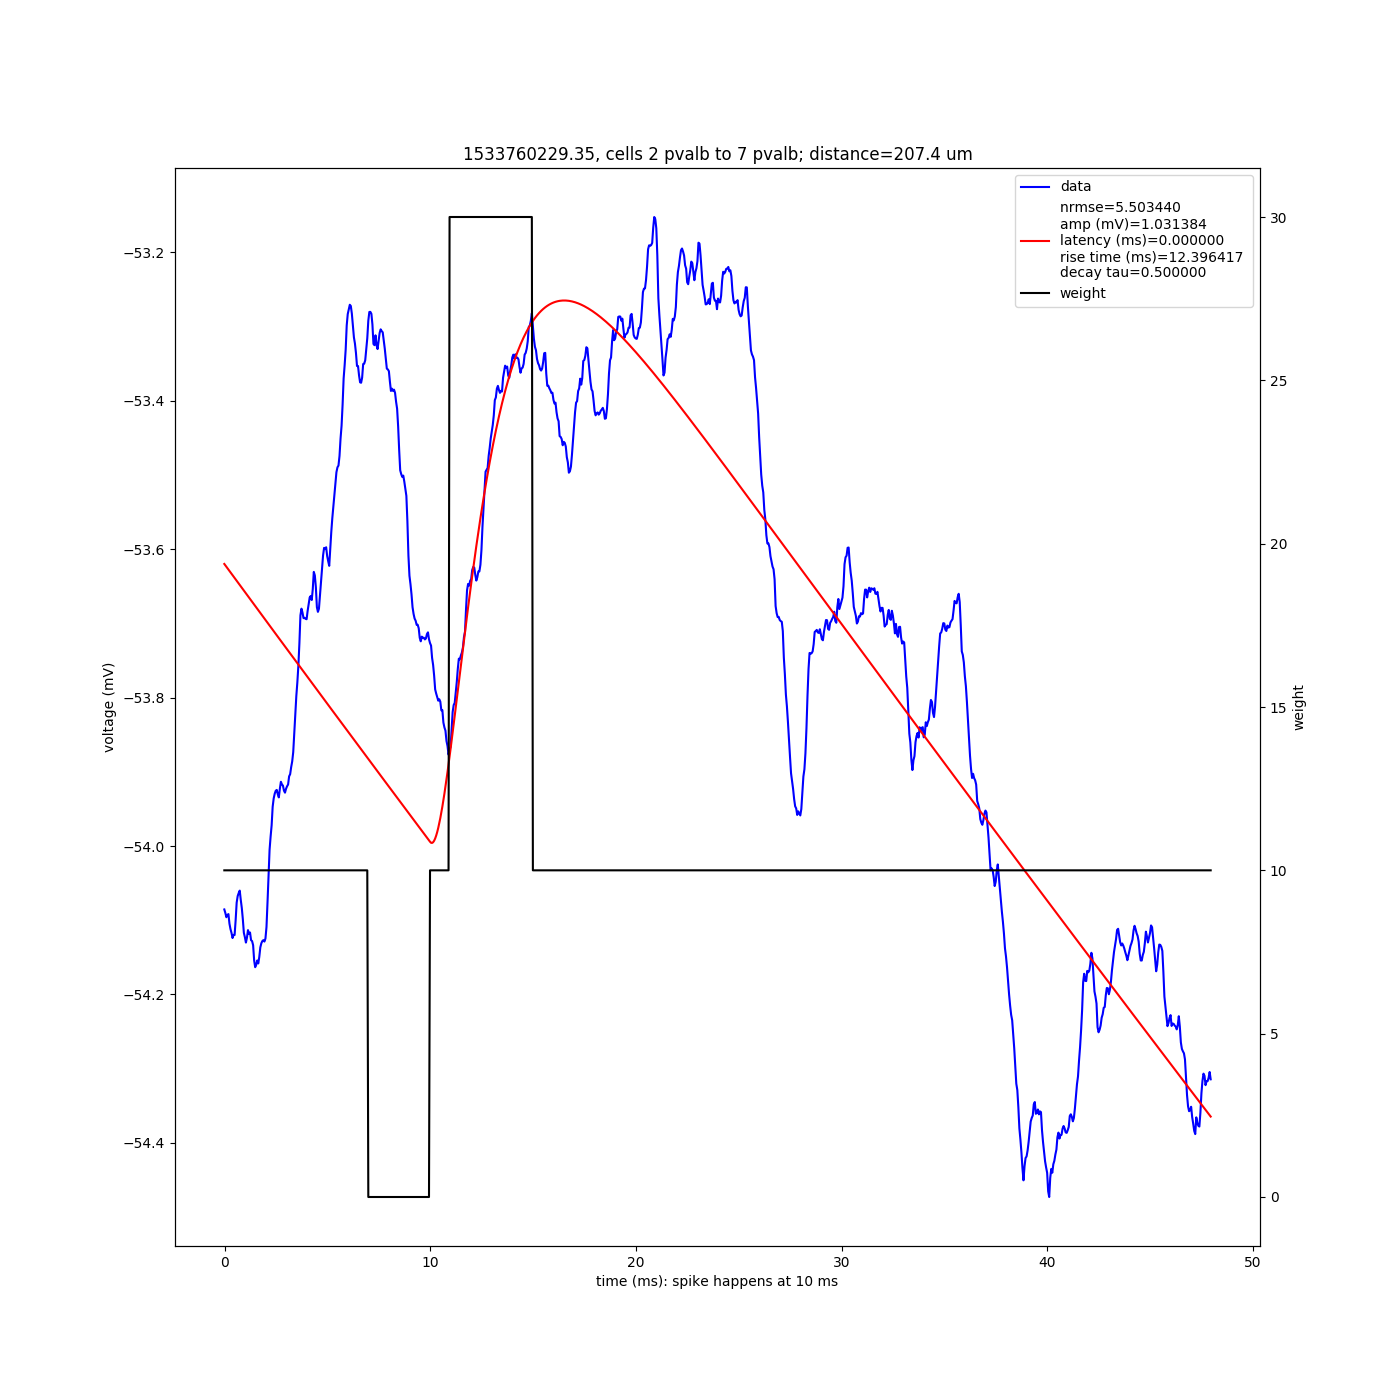

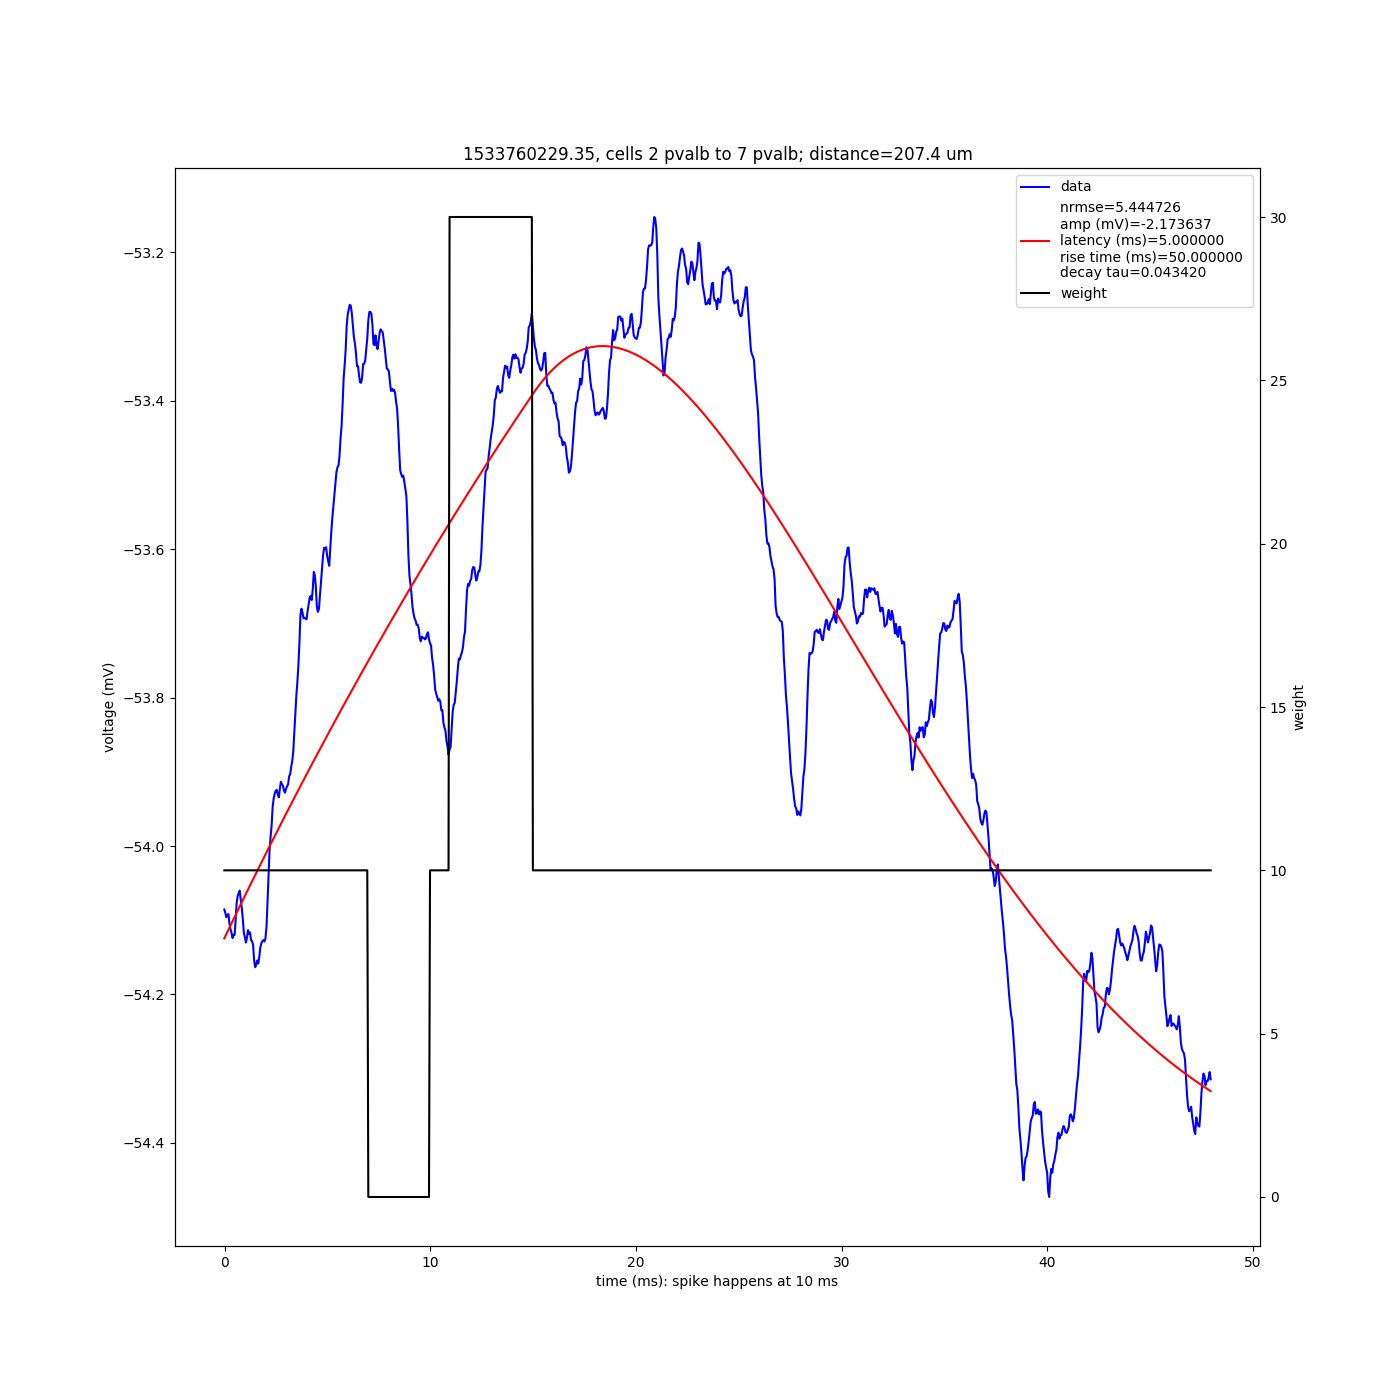

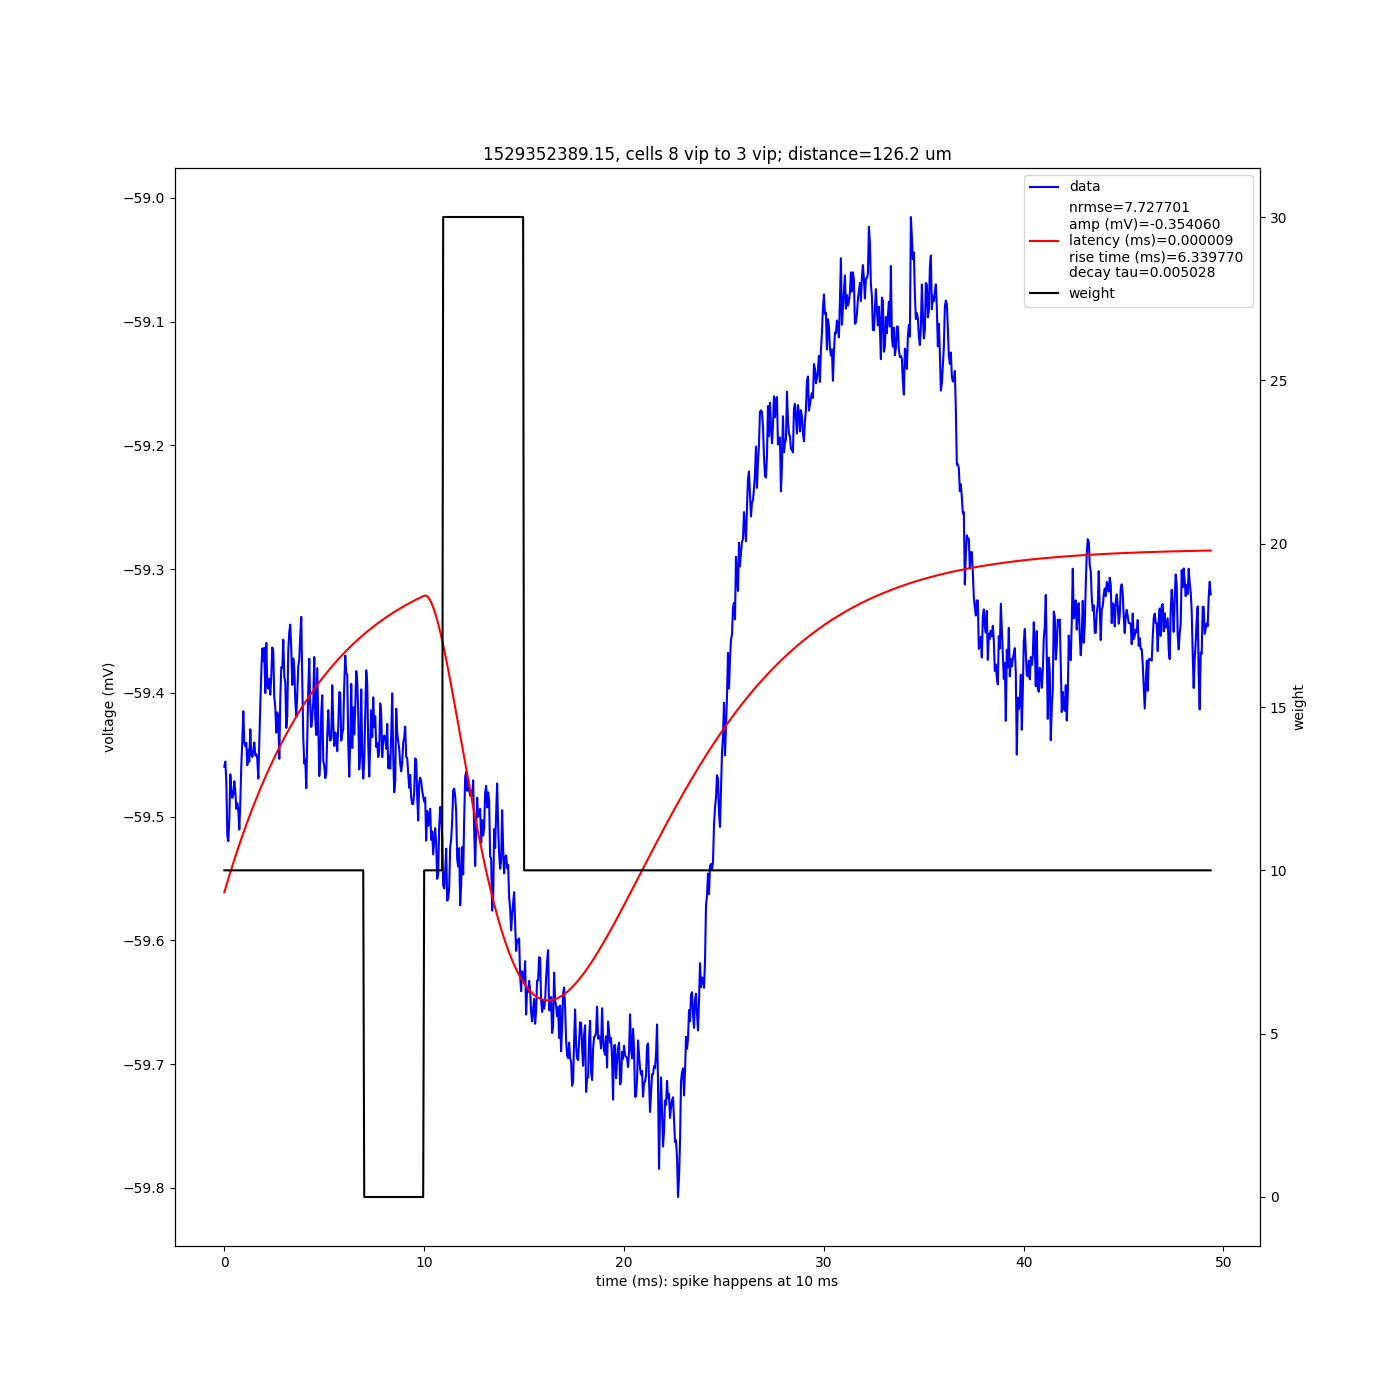

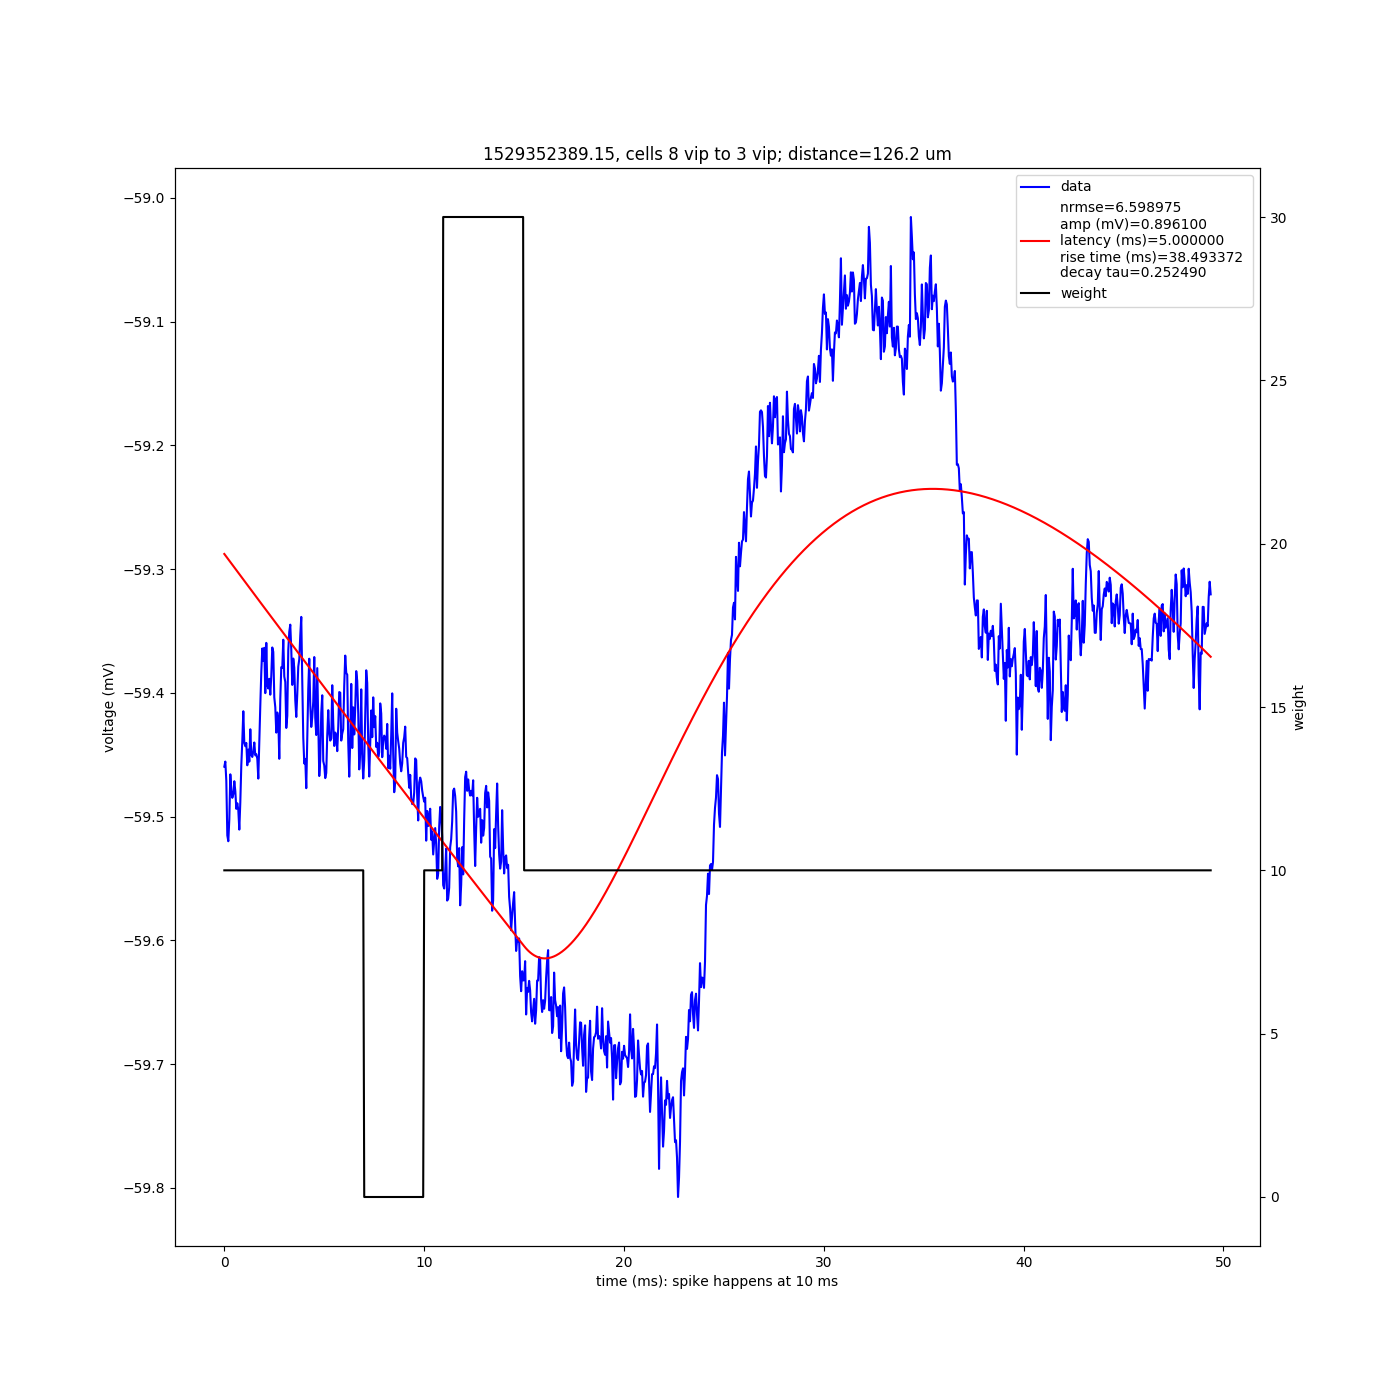

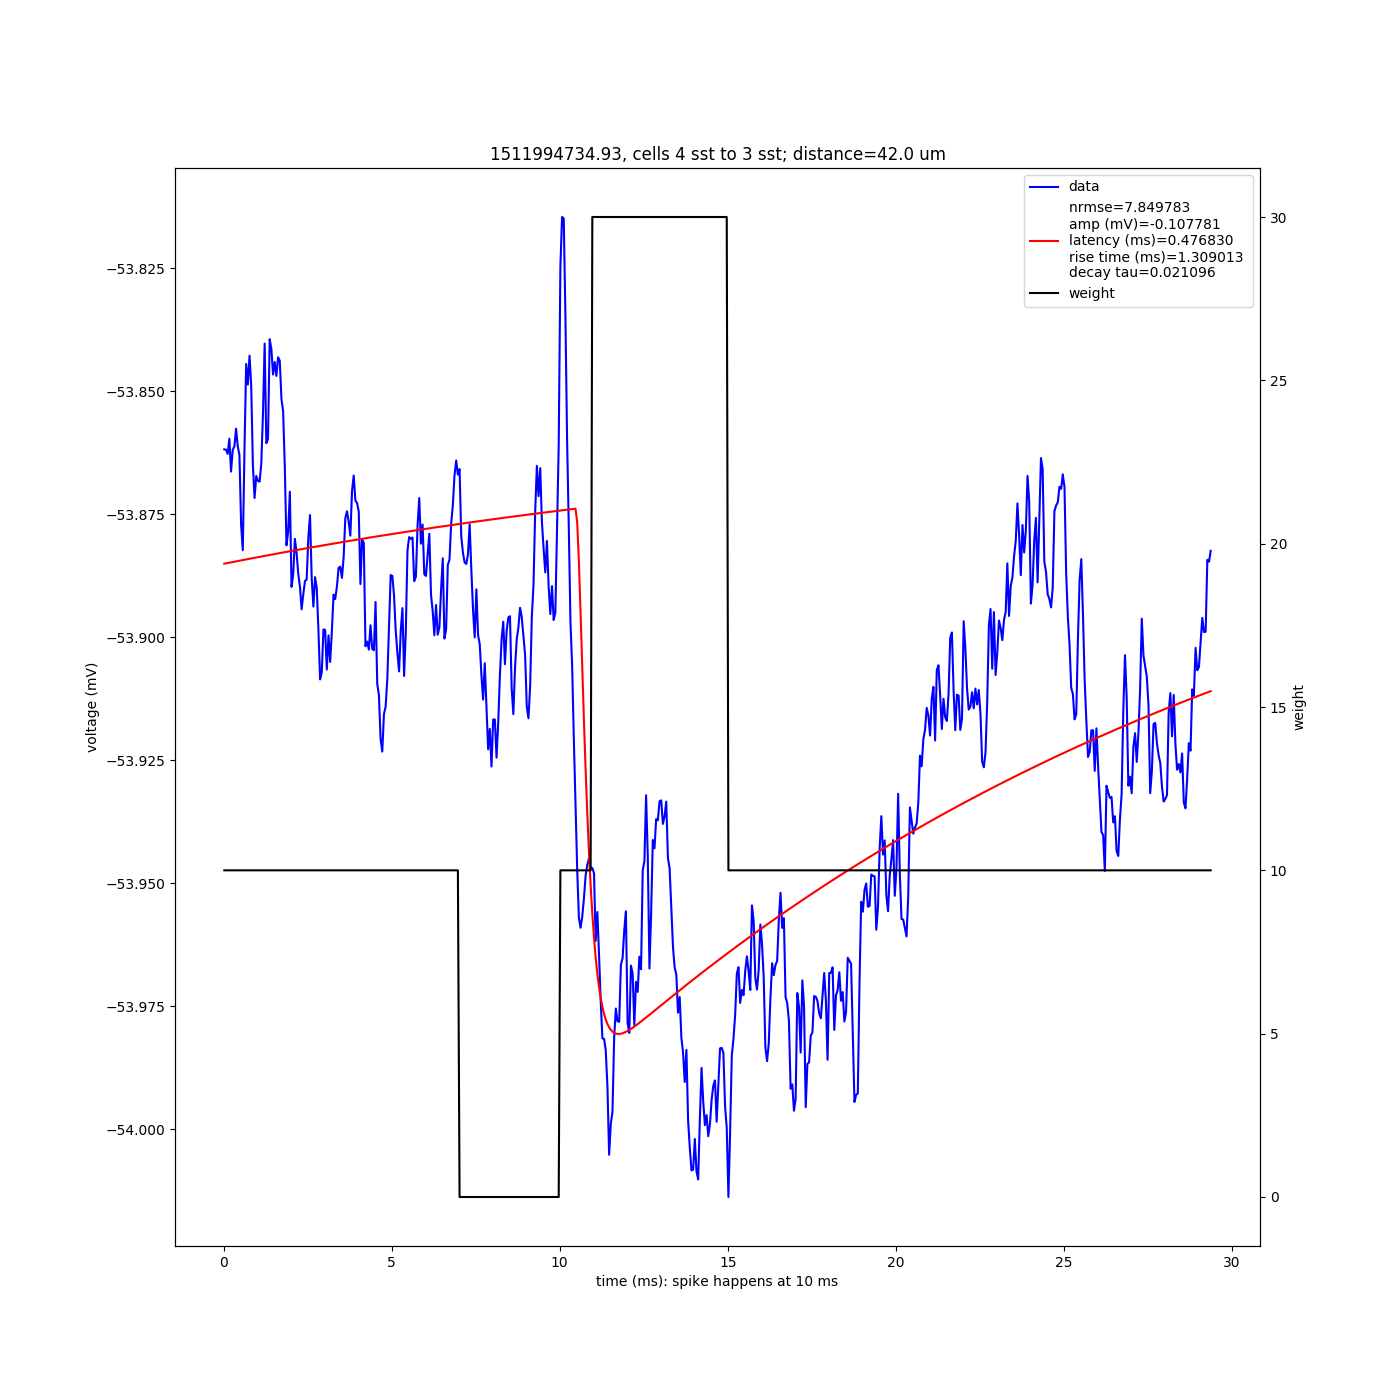

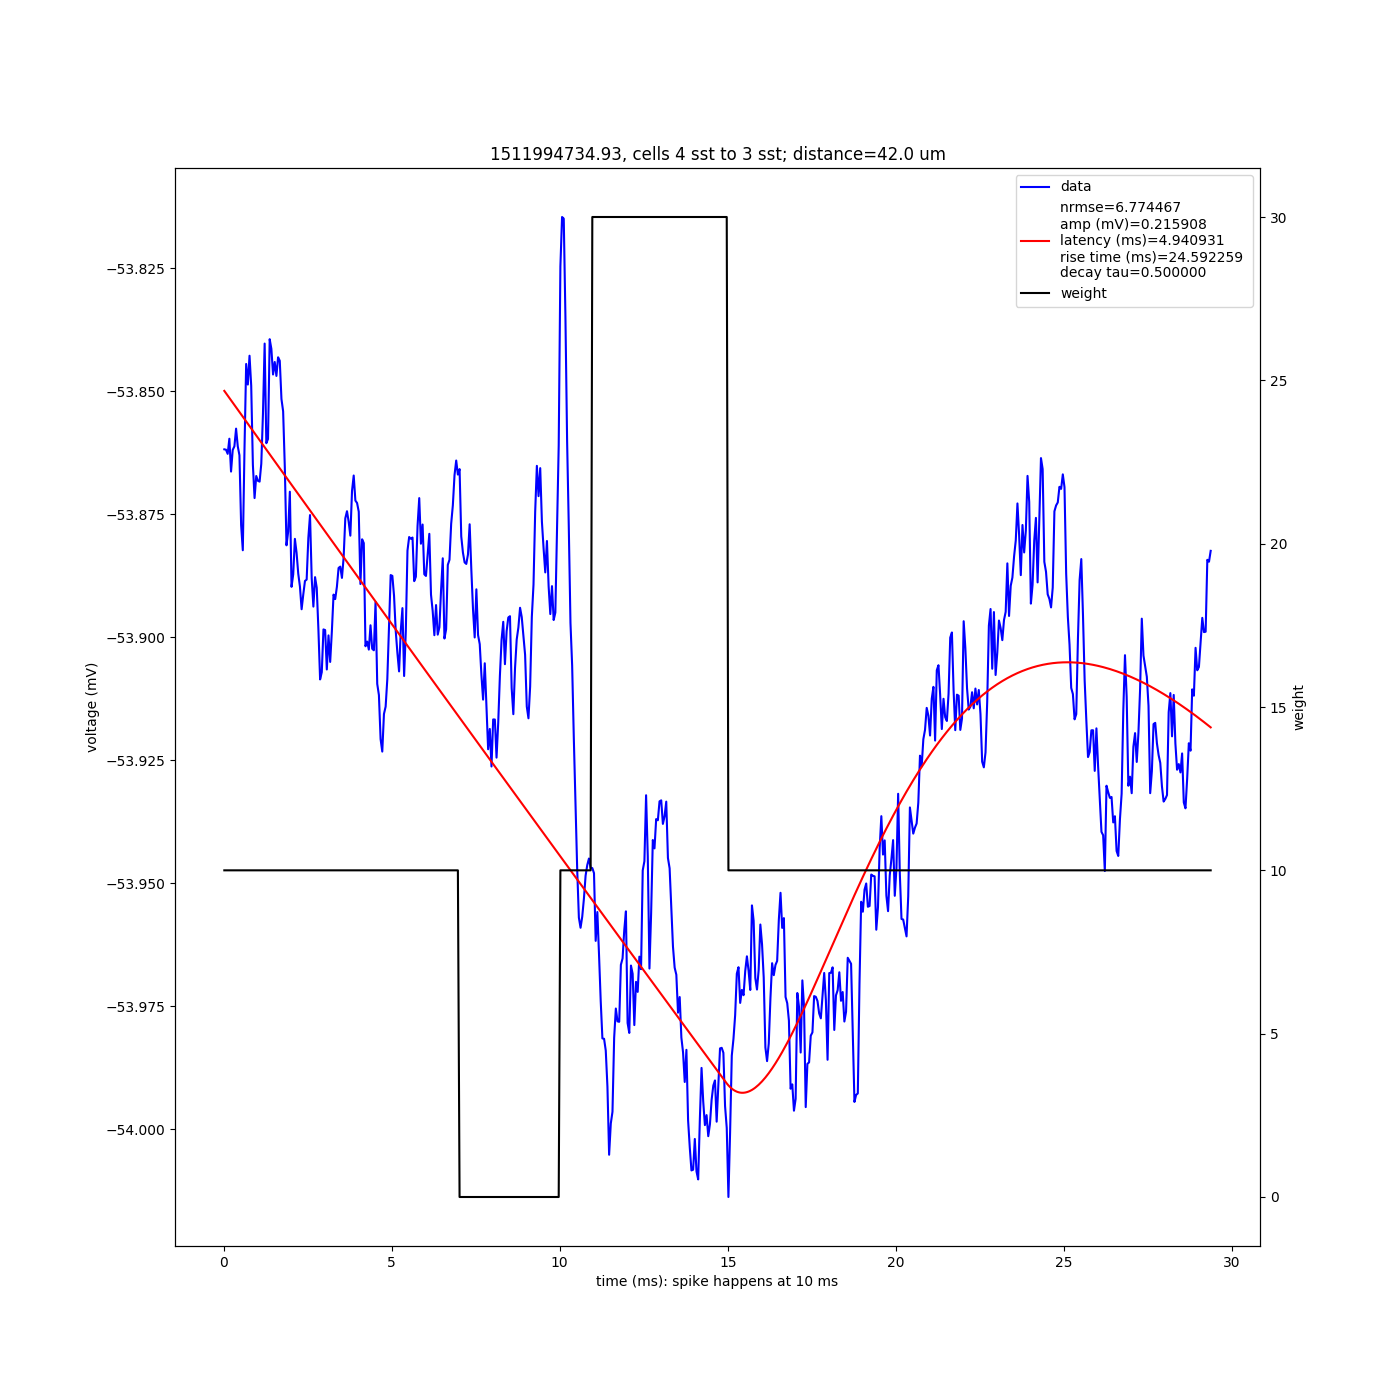

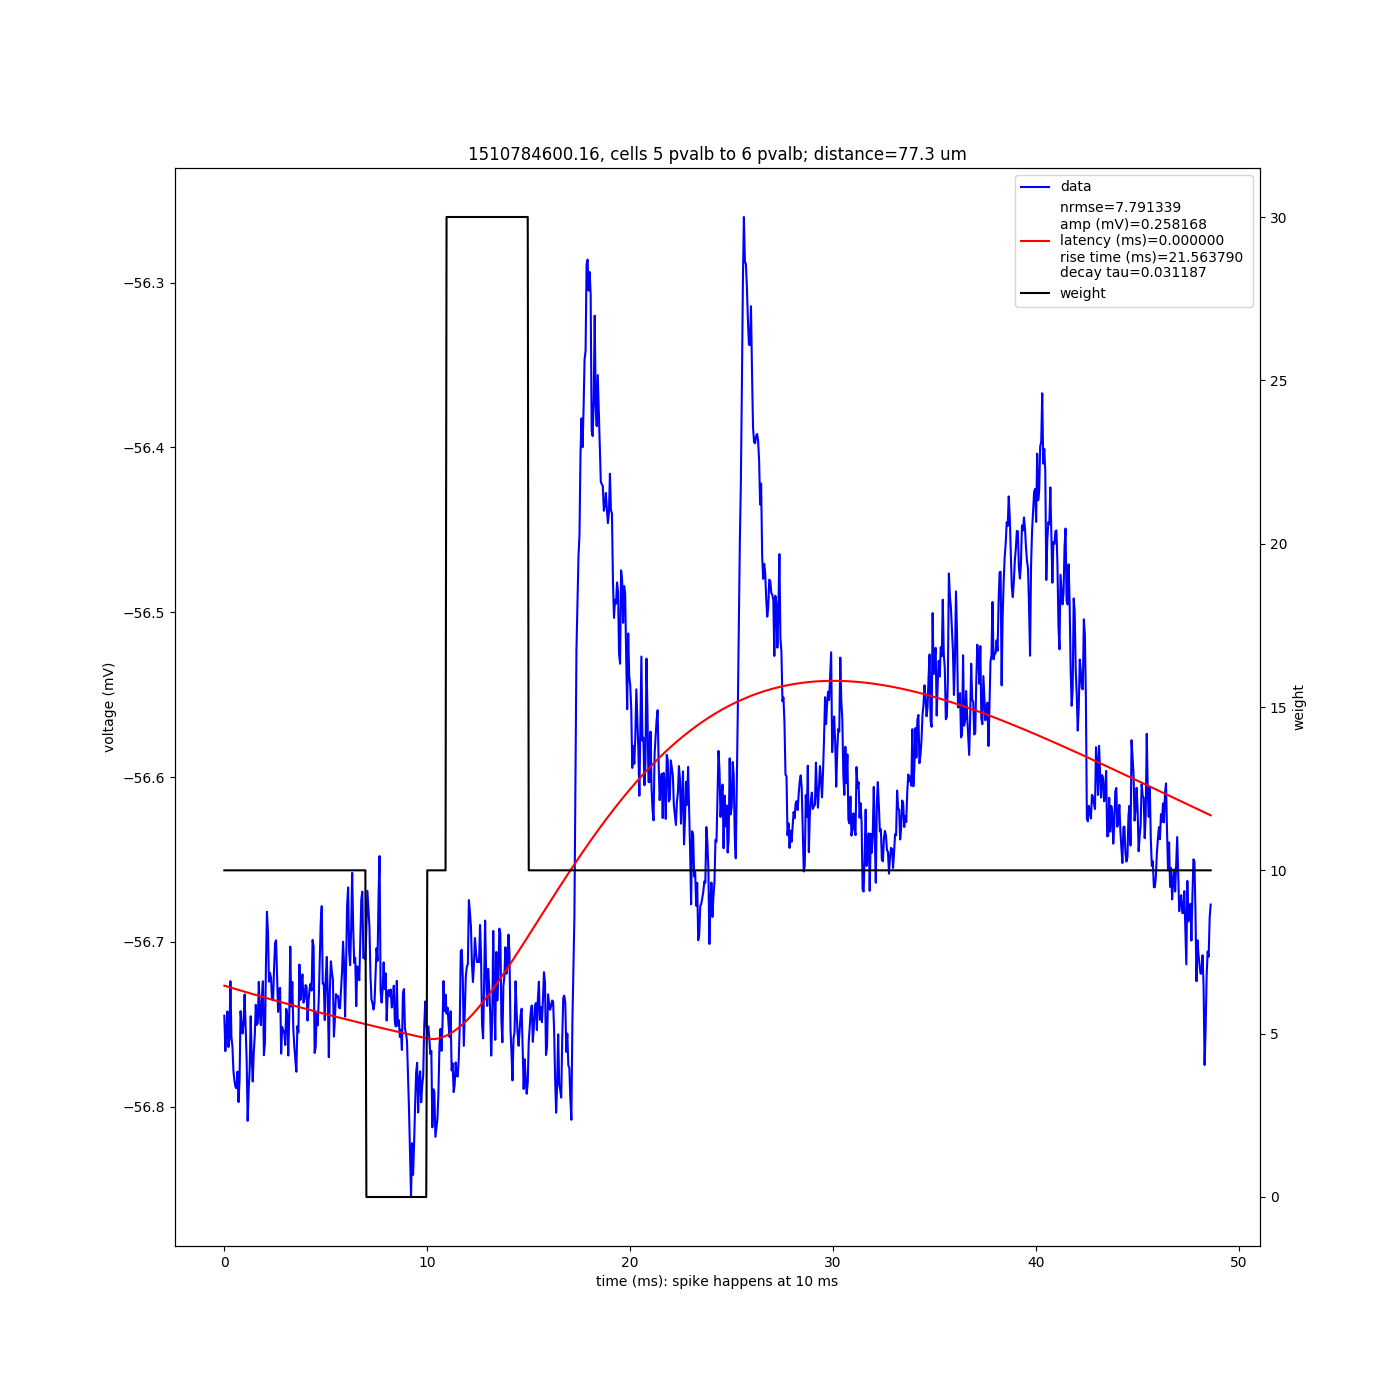

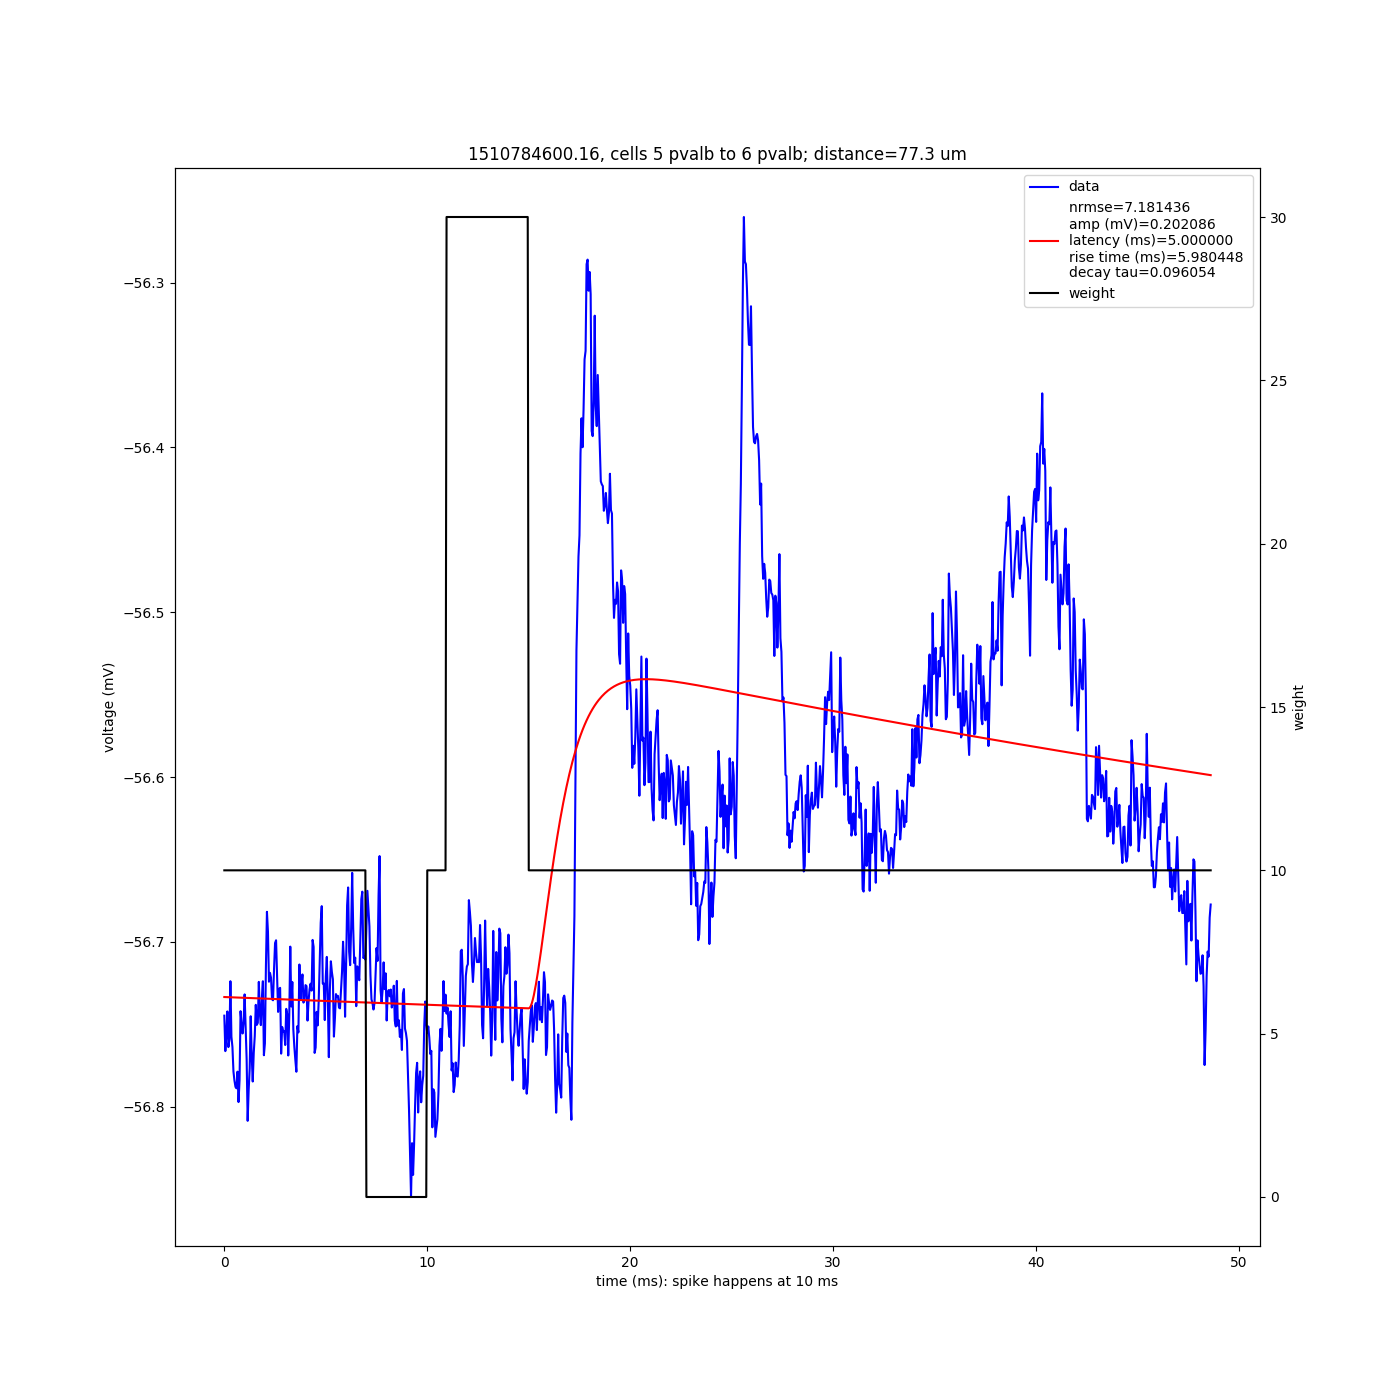

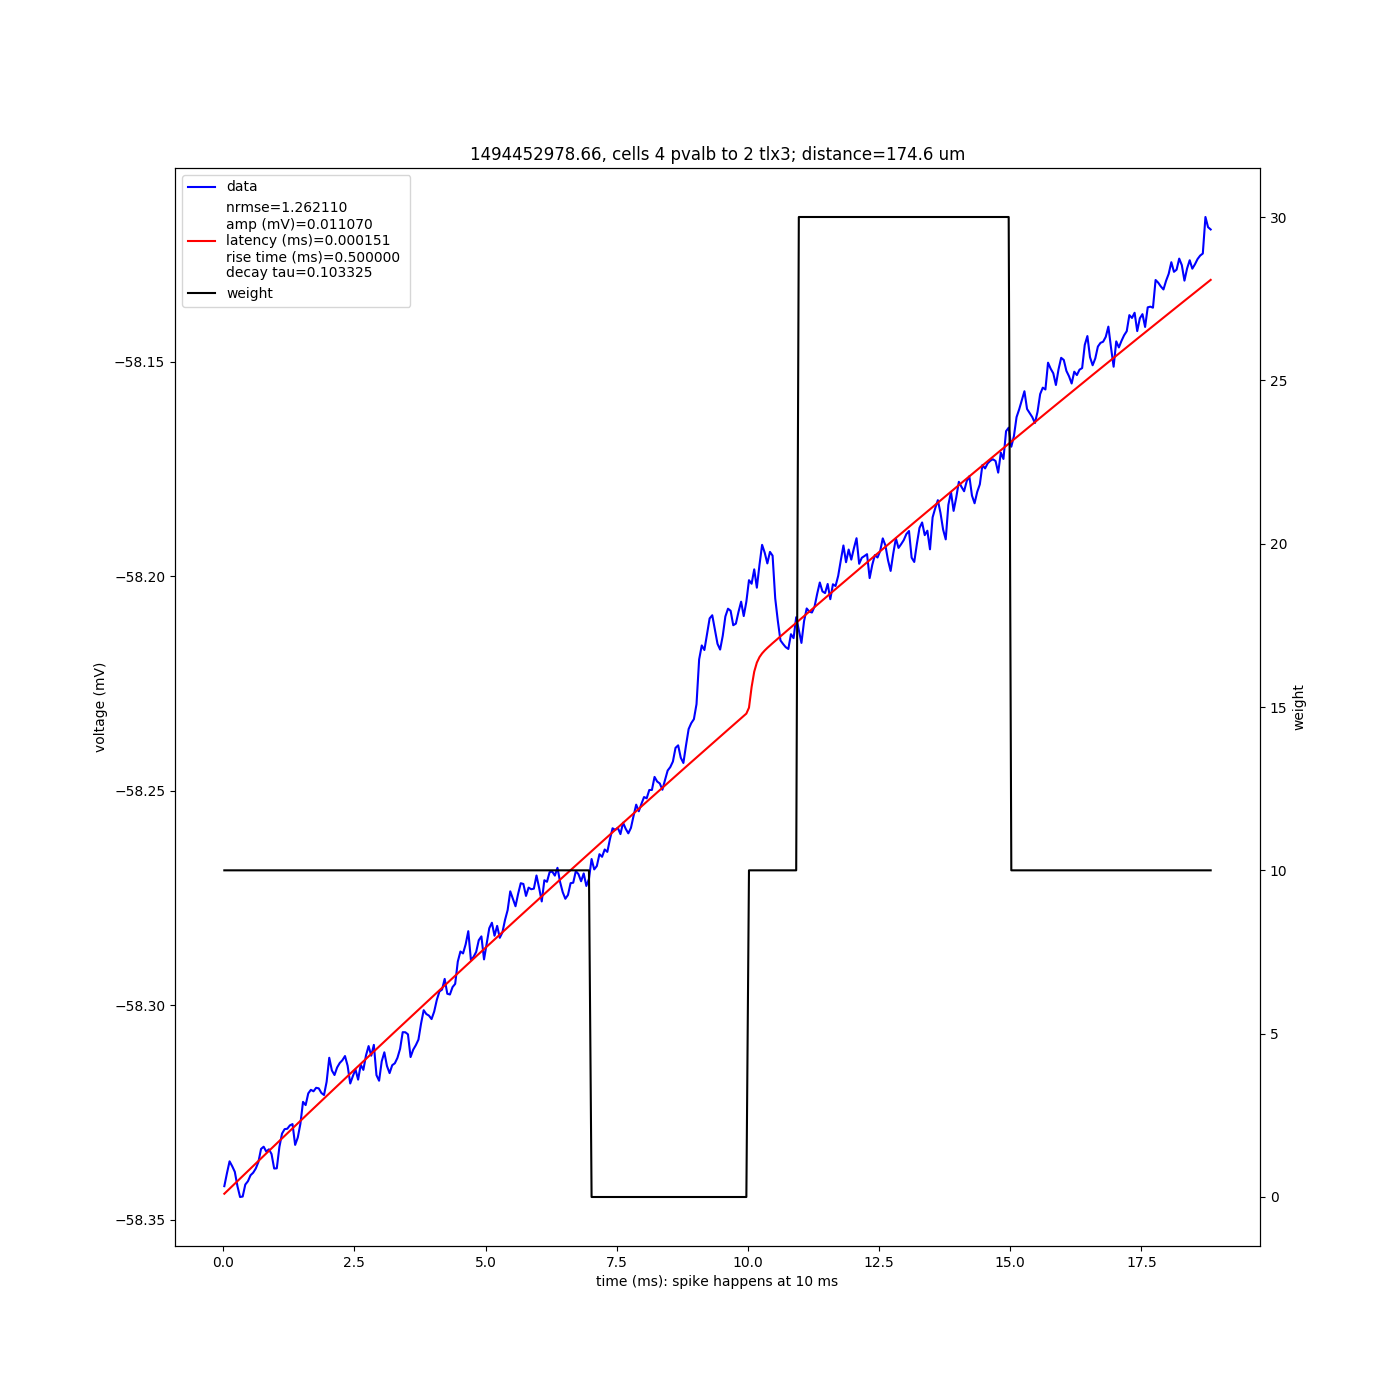

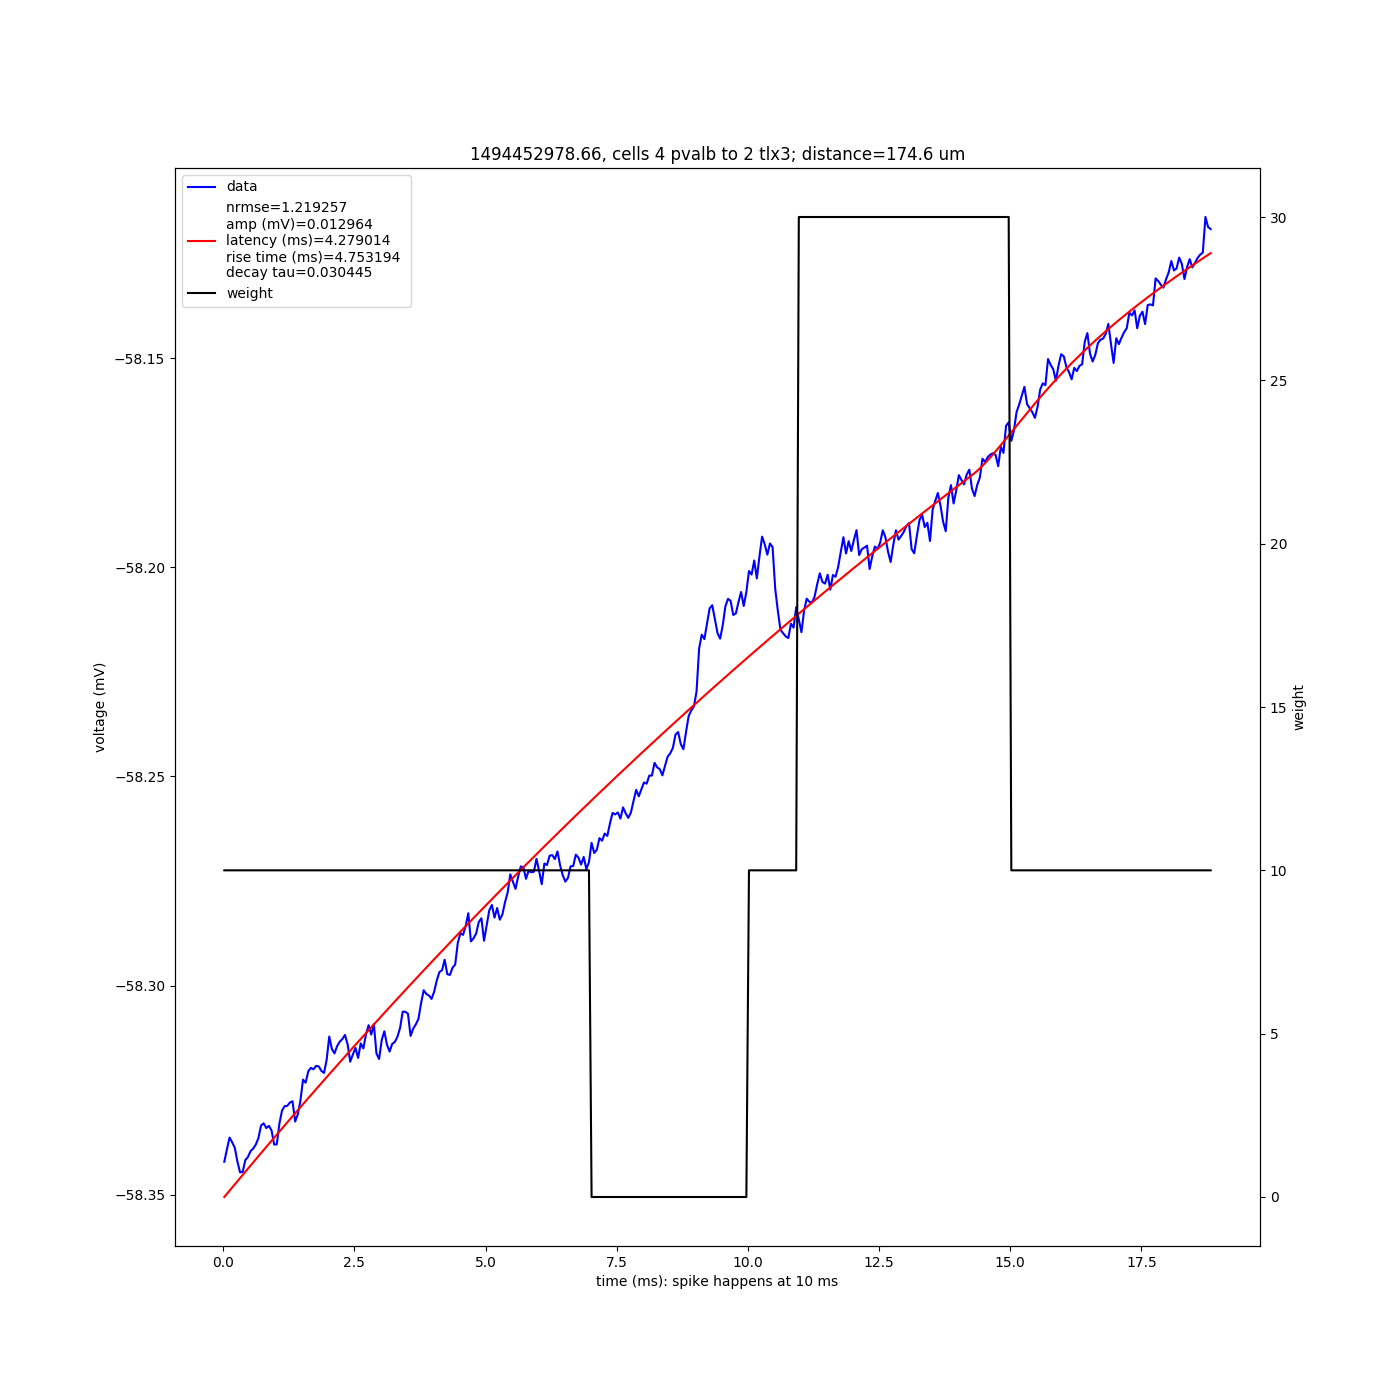

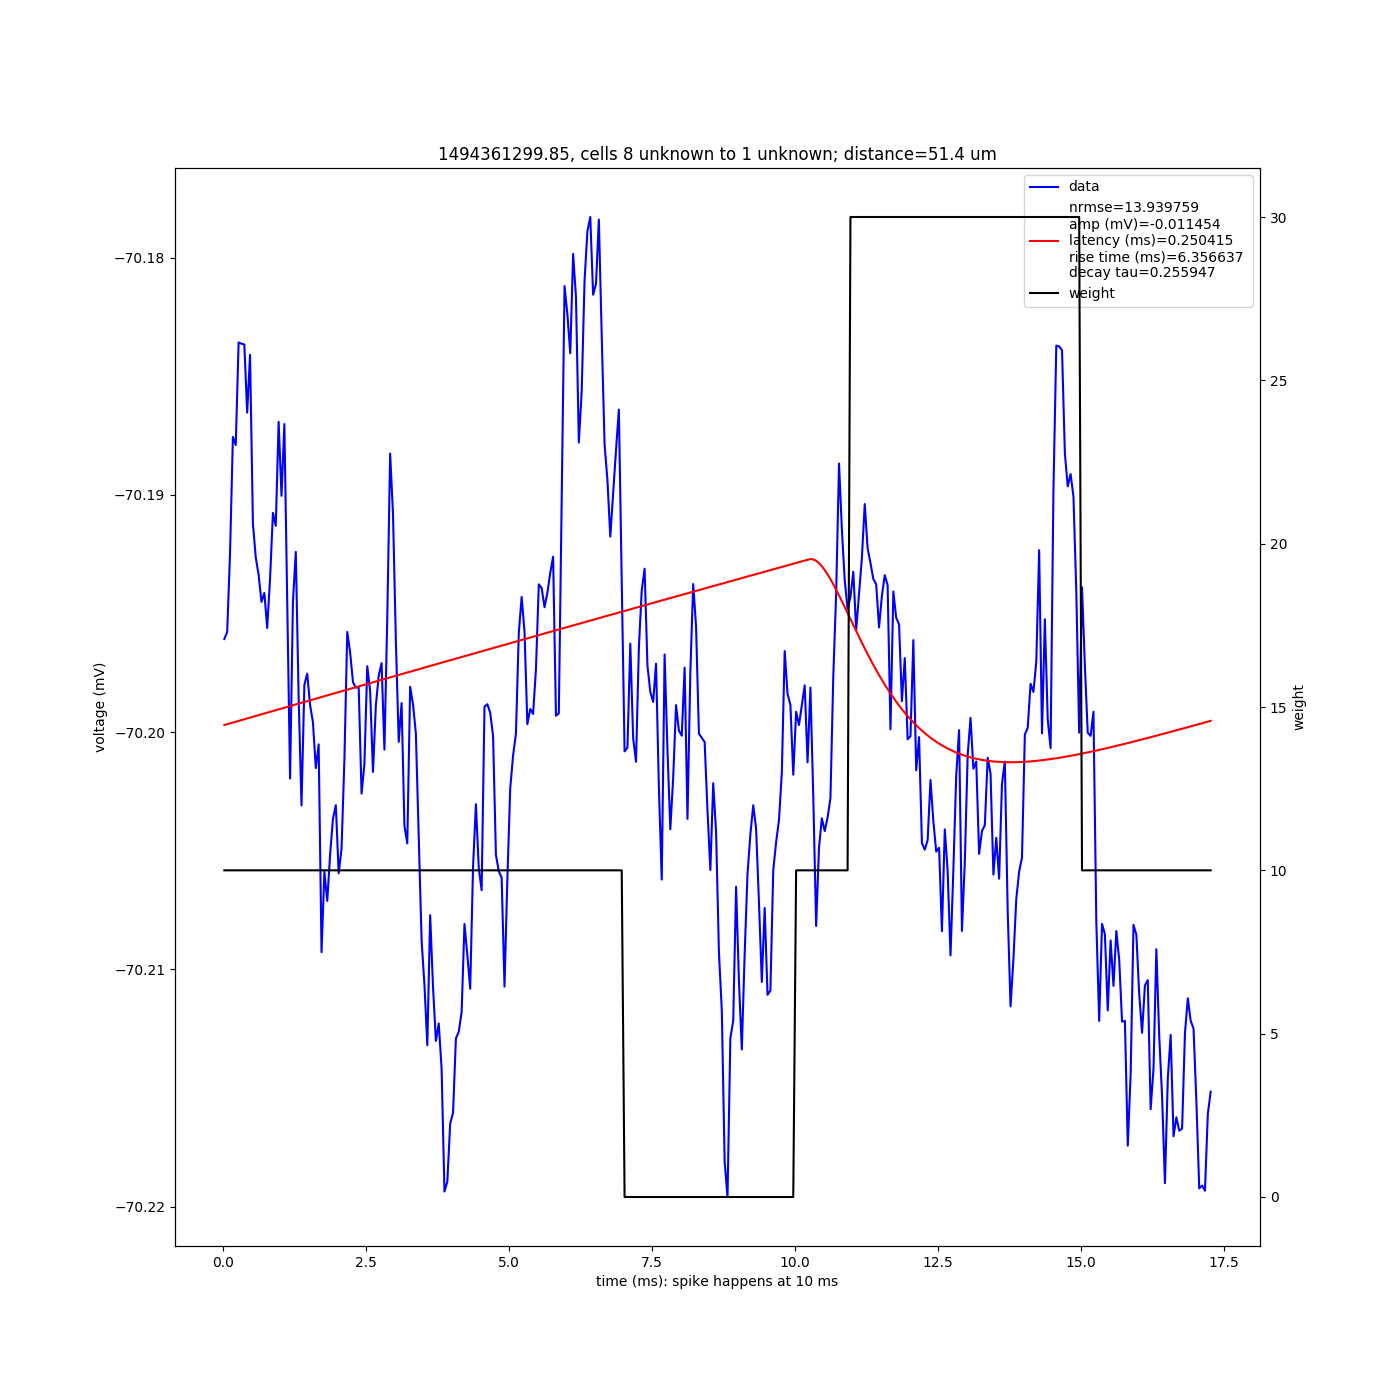

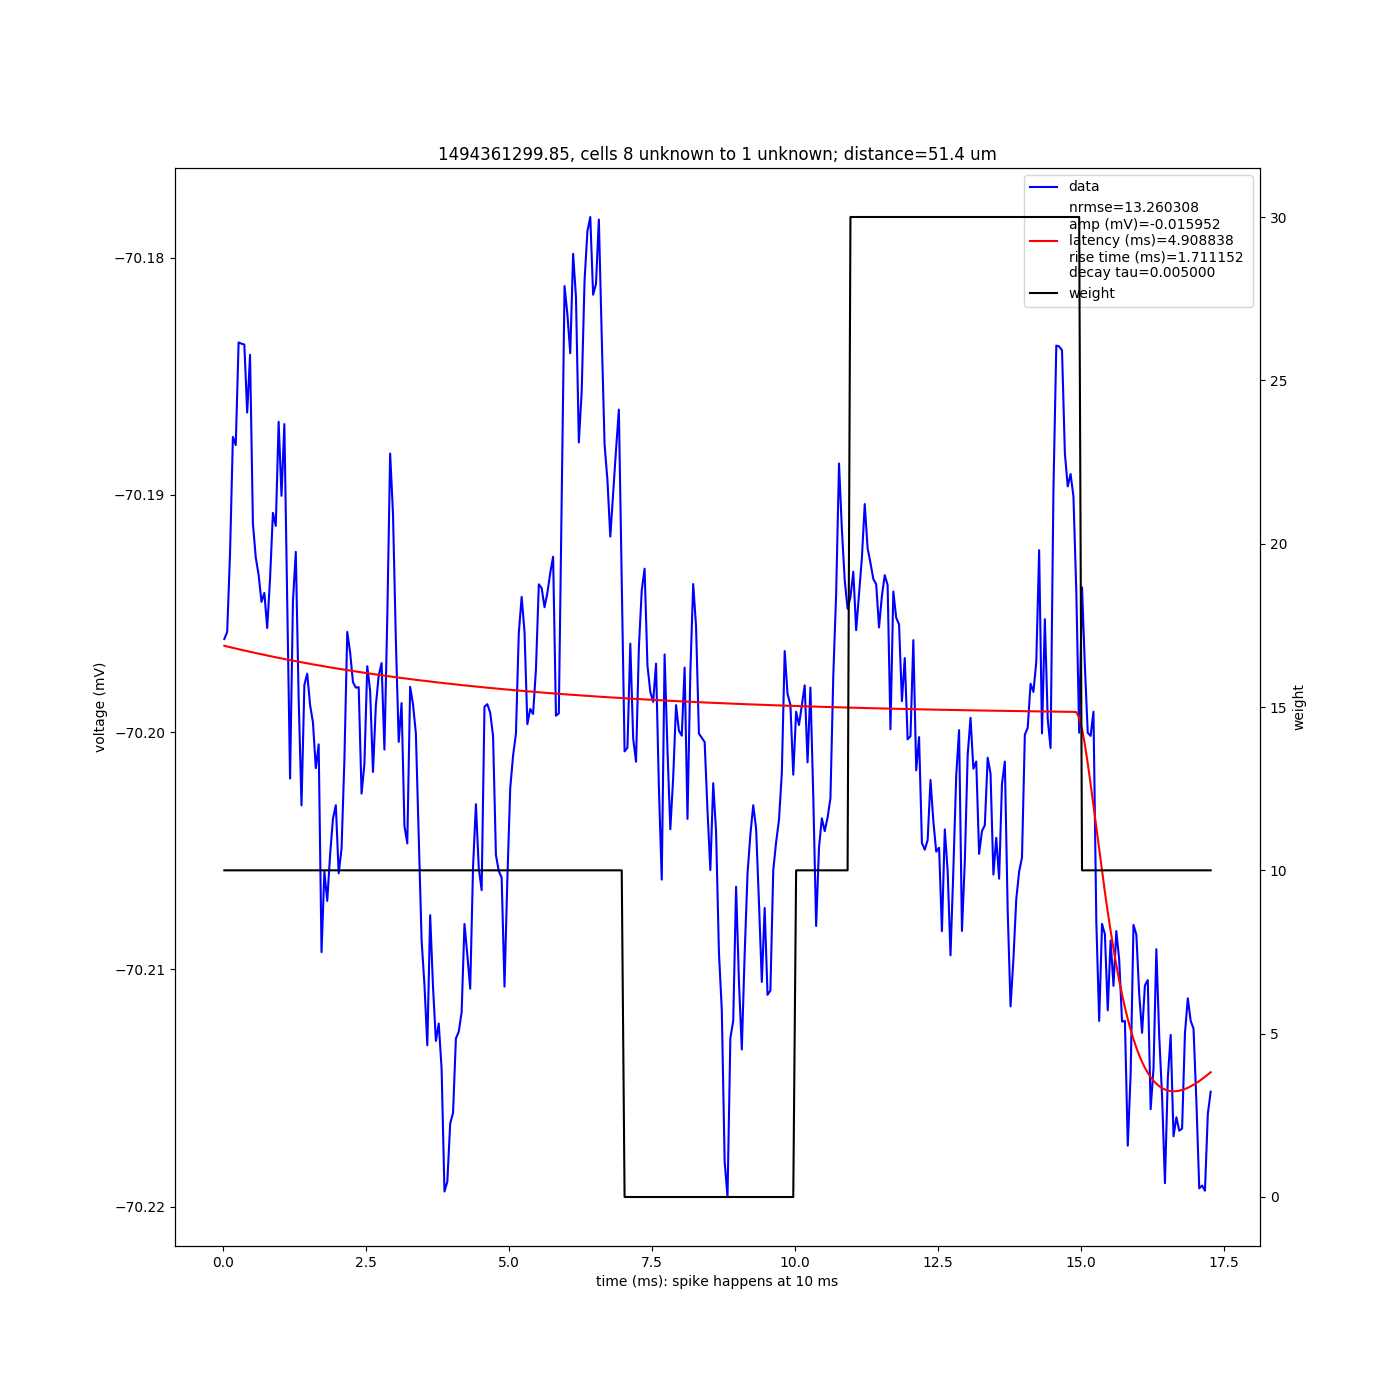

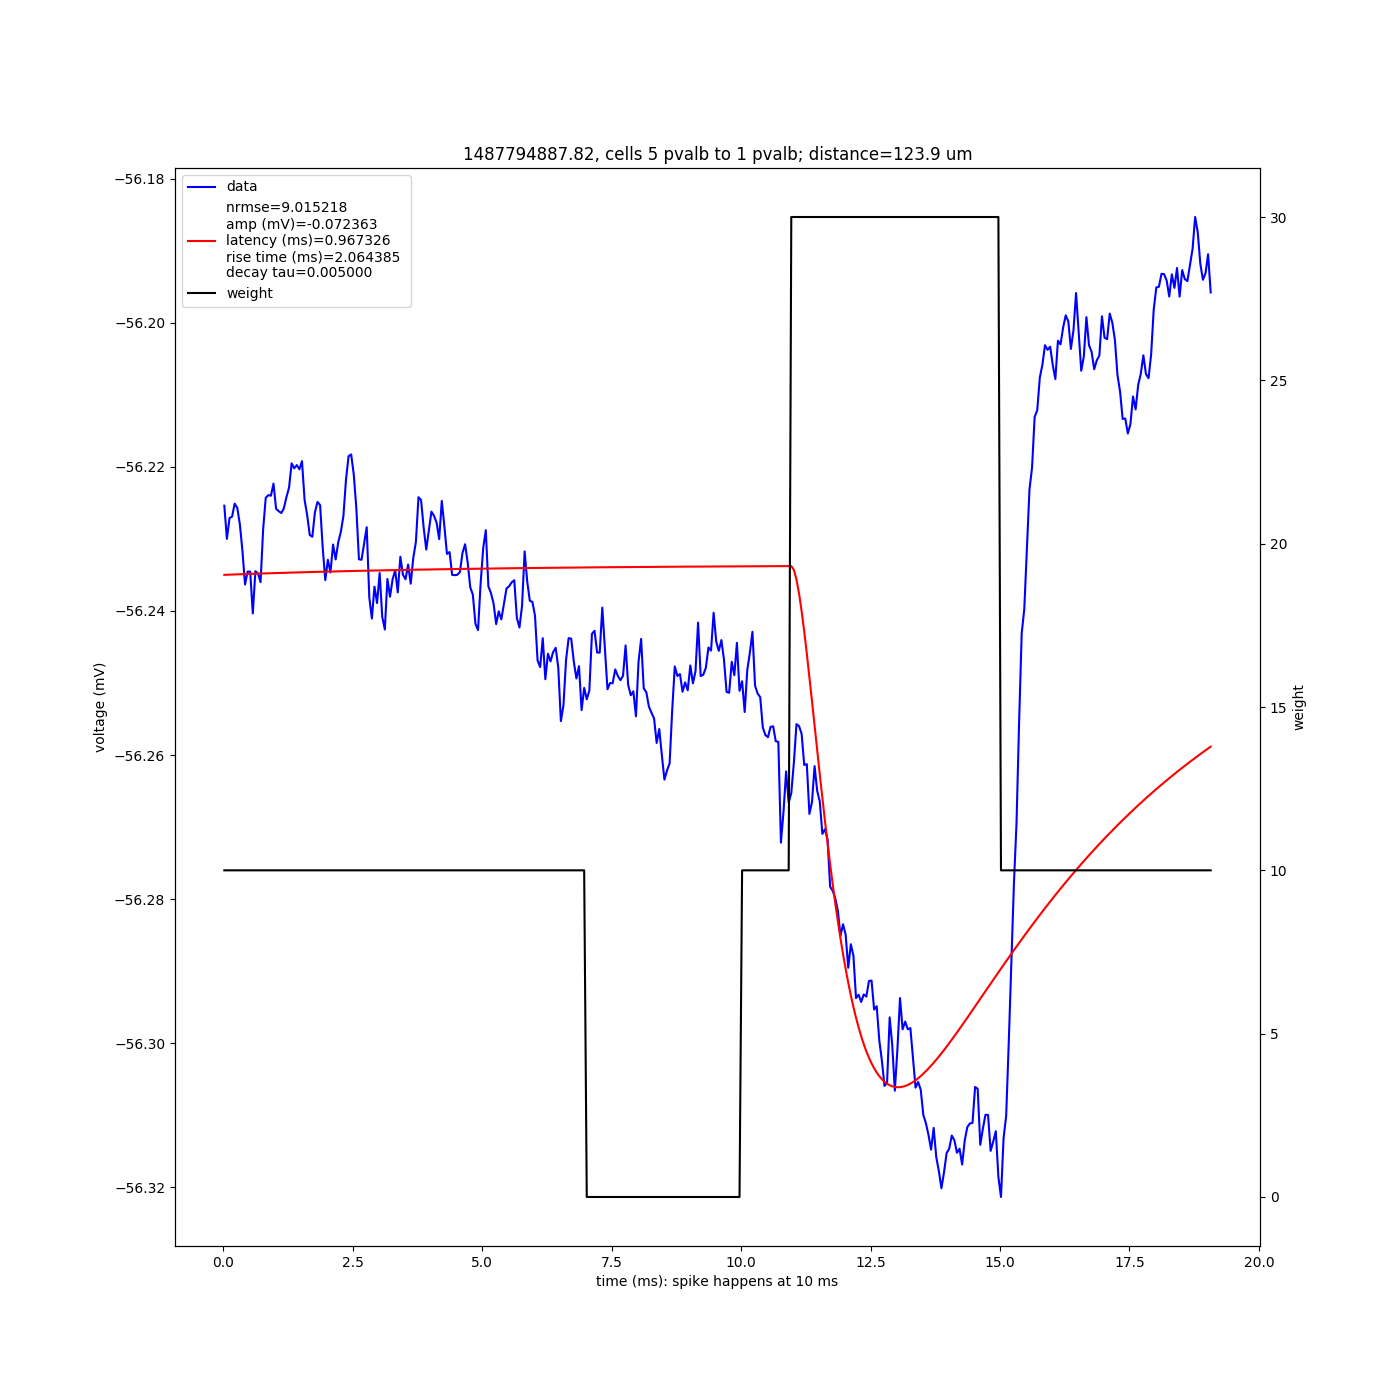

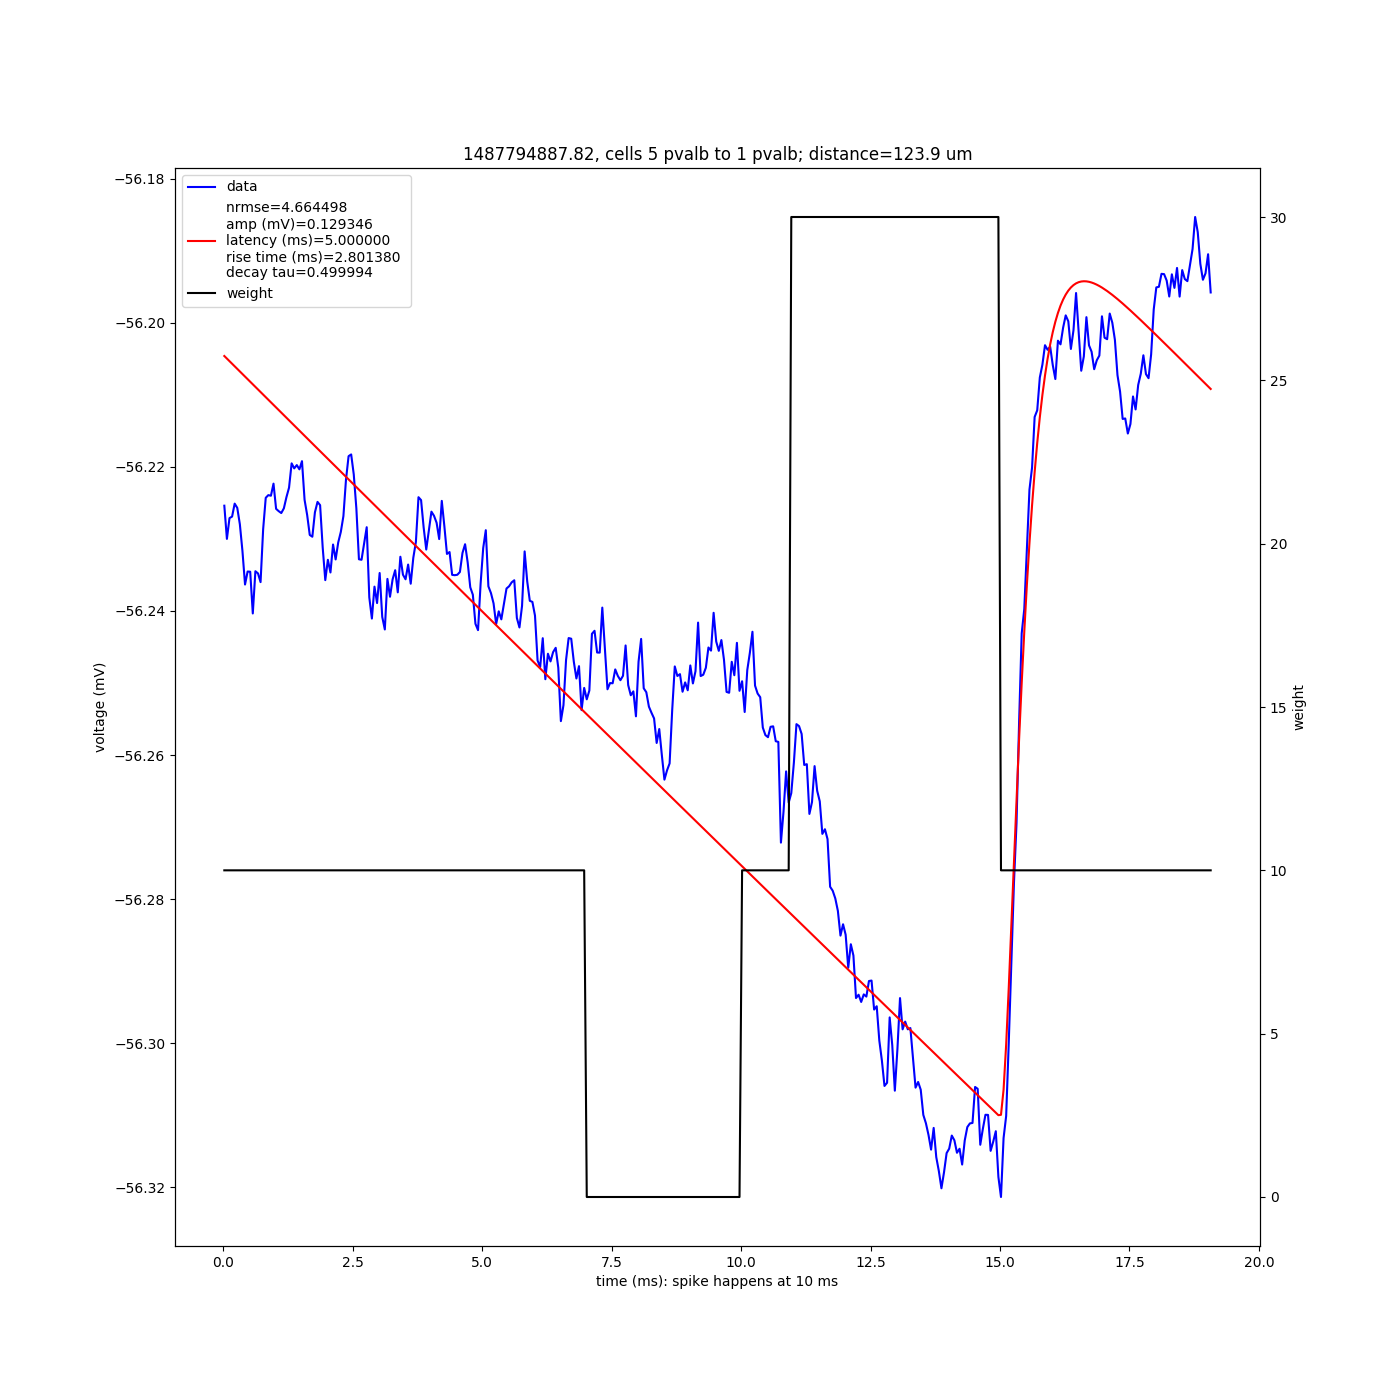

In [25]:
from IPython.display import Image, display 
for f, a in zip(s_df['image_path_f'], s_df['image_path_a']):
    if type(f) is str:
        display(Image(filename=f))
    if type(a) is str:
        display(Image(filename=a))